## 1. Data Wrangling<a id='1._Data Wrangling'></a>

In [1]:
# importing relevant packages
import os
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import collections
import shap
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import re
import string
import warnings
from datetime import datetime
import time

## 1.1 Reading user file <a id='1.1_Reading user file'></a>

In [2]:
df_user=pd.read_csv("takehome_users.csv",encoding = "ISO-8859-1")

In [3]:
df_user.shape

(12000, 10)

In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df_user.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [7]:
df_user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [8]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
#Visualizing the number of creation sources
print("creation_source",df_user.creation_source.unique())

creation_source ['GUEST_INVITE' 'ORG_INVITE' 'SIGNUP' 'PERSONAL_PROJECTS'
 'SIGNUP_GOOGLE_AUTH']


In [10]:
#Visualizing the value in mailing list
print(df_user.opted_in_to_mailing_list.unique())

[1 0]


In [11]:
#Visualizing the value in marketing drip
print(df_user.enabled_for_marketing_drip.unique())


[0 1]


In [12]:
#Visualizing the value in organization id
print(df_user.org_id.unique())
print(len(df_user.org_id.unique()))

[ 11   1  94 193 197  37  74 302 318  69 130 254   0 175 211   2  58  54
   7   6 123  81  56 134  92 251 283  98 401  33  59 109 276 208 332  64
 235  63  14   4 127  32 224 304  61  51 229  88 325 150 347 203  21 409
 215 141   5 107 184 310 367 389  89 242  68  16  49 185  91 172   8  43
 249  26 139  70  10 252  53 119   3 196 335 375 303 307  25 370  83  27
 306 118 295  19 301 100 112 263  39  12  86 402  42 103 373 268  30 406
  48 313   9 138 261  35 264  95  55  60 234  28 410 170 374  15  17 364
  62 244 342 225 121 255 411 217 165 415 104 329 278 116 151 290 200 187
 122 353 135 328  36  13 341 349 198 153 108  77 142 275 176  87 191 102
 245 154 218 385  76 321 159 371  50  75 333 137 292 286 131 178 213 376
 366 192 300 316  52  40  79 398 336  20 269 147  47  18 382 365 188 144
  45 343 231 338 311 340 334 163 156  84 110 285 380 148 272 414 237 129
 346 362  82 282 152 331  71 160 105 221 171 361 136 143 164 413 128 273
 352 327  31 394 162 289 381 319 205 320  29 222  2

In [13]:
print(df_user.invited_by_user_id.unique() )
print(len(df_user.invited_by_user_id.unique()) )

[10803.   316.  1525. ...  5093. 11854.  5450.]
2565


## 1.2  Reading user engagement <a id='1.2_Reading user engagement'></a>

In [14]:
df_engage=pd.read_csv("takehome_user_engagement.csv")

In [15]:
df_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
df_engage.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [17]:
df_engage.shape

(207917, 3)

In [18]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [19]:
df_engage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [20]:
df_engage["time_stamp"]=pd.to_datetime(df_engage.time_stamp)
#df_engage['DateTime']=df_engage['time_stamp'].dt.strftime('%d/%m/%Y')
#df_engage['DateTime']=pd.to_datetime(df_engage['DateTime'])
#df_engage['Time']=df_engage['time_stamp'].dt.strftime('%H:%M')

## 1.3  Identify adopted users <a id='1.3_Identify adopted users'></a>

In [21]:
Total_user=df_user.shape[0]
Adopted_user = np.zeros(Total_user)
User_id_list = range(1,len(df_user.object_id))
Total_log=np.zeros(Total_user)

period=7
min_log=3
sevenday_period=pd.Timedelta(days=period)

usersId=df_engage.user_id.unique()

for i in usersId:
#for i in [2]:
    df_user_log=df_engage[df_engage.user_id==i].sort_values(by="time_stamp")
    total_user_log=df_user_log.shape[0]
    Total_log[i-1]=total_user_log
    
    if (total_user_log>=min_log):
        Date_log=df_user_log.time_stamp
        frequent=False
        for s in range(2,total_user_log):
            log1=Date_log.iloc[s]
            log2=Date_log.iloc[s-1]
            diff1=(log1-log2)
            #print(i,s,log2, log1, diff1) 
            if (diff1 <=sevenday_period) :
                log2=Date_log.iloc[s-1]
                log3=Date_log.iloc[s-2]
                diff2=(log2-log3)
                if (diff2 <=sevenday_period) : 
                    frequent=True
                    #print(i,s,log3,log2, log1, diff1, diff2, frequent) 
                    Adopted_user[i-1]=1
  
                    break
                
    #if (frequent==False):
    #    print(i,frequent)


In [22]:
data_tuples=list(zip(User_id_list,Total_log, Adopted_user))
df_adopted=pd.DataFrame(data_tuples, columns=['object_id','log_count','adopted'])
#df_adopted(4)

In [23]:
df=df_user.merge(df_adopted, on = 'object_id')
df.head(15)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,log_count,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0.0,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.0,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,284.0,1.0


## 1.4  Generate additional features replacing missing values <a id='1.4_Generate additional features replacing missing values'></a>

In [24]:
#addition of new features
df["creation_time"]=pd.to_datetime(df.creation_time)
df["creation_time_utc"]=(df.creation_time - pd.to_datetime('1970-01-01')).dt.total_seconds()

#Replace mission values in last session
df.last_session_creation_time.fillna(df.creation_time_utc,inplace=True)  #if account is created but never log in replace with creation time

#account creation to last login
df['delta_last_creation']=df["last_session_creation_time"]-df["creation_time_utc"]

#current time
current_time=int(time.time())


#account creation from current time
df['delta_creation']=current_time-df["creation_time_utc"]
df['delta_login']=current_time-df["last_session_creation_time"]
df.head(15)



,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,log_count,adopted,creation_time_utc,delta_last_creation,delta_creation,delta_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,1.398139e+09,0.0,225126915.0,225126915.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,1.0,1.384487e+09,11750400.0,238778621.0,227028221.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,1.363735e+09,0.0,259530833.0,259530833.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,1.369124e+09,86400.0,254141957.0,254055557.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,1.358418e+09,432000.0,264848065.0,264416065.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,0.0,1.387251e+09,172800.0,236014299.0,235841499.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0,0.0,1.355664e+09,345600.0,267601453.0,267255853.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1.375249e+09,1,1,74,NaN,0.0,0.0,1.375249e+09,0.0,248016883.0,248016883.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1.383624e+09,0,0,302,NaN,0.0,0.0,1.383624e+09,0.0,239641461.0,239641461.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,284.0,1.0,1.358374e+09,43459200.0,264891642.0,221432442.0


In [25]:
df.invited_by_user_id.fillna(0,inplace=True)   #if no invited by any user replace with zero
df.head(15)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,log_count,adopted,creation_time_utc,delta_last_creation,delta_creation,delta_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,1.398139e+09,0.0,225126915.0,225126915.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,1.0,1.384487e+09,11750400.0,238778621.0,227028221.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,1.363735e+09,0.0,259530833.0,259530833.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,1.369124e+09,86400.0,254141957.0,254055557.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,1.358418e+09,432000.0,264848065.0,264416065.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,0.0,1.387251e+09,172800.0,236014299.0,235841499.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,1.0,0.0,1.355664e+09,345600.0,267601453.0,267255853.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1.375249e+09,1,1,74,0.0,0.0,0.0,1.375249e+09,0.0,248016883.0,248016883.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1.383624e+09,0,0,302,0.0,0.0,0.0,1.383624e+09,0.0,239641461.0,239641461.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,284.0,1.0,1.358374e+09,43459200.0,264891642.0,221432442.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 0 to 11998
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   11999 non-null  int64         
 1   creation_time               11999 non-null  datetime64[ns]
 2   name                        11999 non-null  object        
 3   email                       11999 non-null  object        
 4   creation_source             11999 non-null  object        
 5   last_session_creation_time  11999 non-null  float64       
 6   opted_in_to_mailing_list    11999 non-null  int64         
 7   enabled_for_marketing_drip  11999 non-null  int64         
 8   org_id                      11999 non-null  int64         
 9   invited_by_user_id          11999 non-null  float64       
 10  log_count                   11999 non-null  float64       
 11  adopted                     11999 non-null  float64   

## 2  Exploratory Data analysis <a id='1.4_Exploratory Data analysis'></a>


## 2.1  Explore the data <a id='2.2_ Explore the data'></a>

0.0    10200
1.0     1799
Name: adopted, dtype: int64


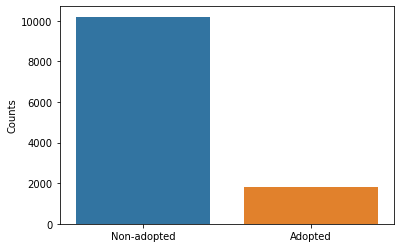

In [27]:
print(df.adopted.value_counts())

x = df.adopted.replace(to_replace=[0, 1], value=['Non-adopted','Adopted'])
g1=sns.countplot(x=x)
g1.set(ylabel='Counts')
g1.set(xlabel=None)
plt.show()

In [28]:
#table = pd.pivot_table(df, values='Creation_source', index=['A', 'B'],columns=['C'], aggfunc=np.sum)
#table = pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)
#table = pd.pivot_table(df, values='adopted', columns=['Creation_source'], aggfunc=np.sum)
#pd.pivot_table(df,index=["creation_source"],columns=['adopted'],aggfunc=np.sum)

In [29]:
#df.groupby('creation_source')['adopted'].value_counts().plot(kind='bar')
#df.groupby('creation_source')['adopted'].value_counts().reset_index(name='sum')

In [30]:
print(df.creation_source.value_counts())

pivedu_source=df.groupby('creation_source')['adopted'].value_counts().reset_index(name='sum')
pivedu_source


ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2086
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64


,creation_source,adopted,sum
0,GUEST_INVITE,0.0,1757
1,GUEST_INVITE,1.0,406
2,ORG_INVITE,0.0,3623
3,ORG_INVITE,1.0,631
4,PERSONAL_PROJECTS,0.0,1927
5,PERSONAL_PROJECTS,1.0,184
6,SIGNUP,0.0,1760
7,SIGNUP,1.0,326
8,SIGNUP_GOOGLE_AUTH,0.0,1133
9,SIGNUP_GOOGLE_AUTH,1.0,252


In [31]:
pivedu1_source=pd.pivot_table(pivedu_source,index=["creation_source"],columns=['adopted'])
pivedu1_source

sum     
adopted              0.0  1.0
creation_source              
GUEST_INVITE        1757  406
ORG_INVITE          3623  631
PERSONAL_PROJECTS   1927  184
SIGNUP              1760  326
SIGNUP_GOOGLE_AUTH  1133  252

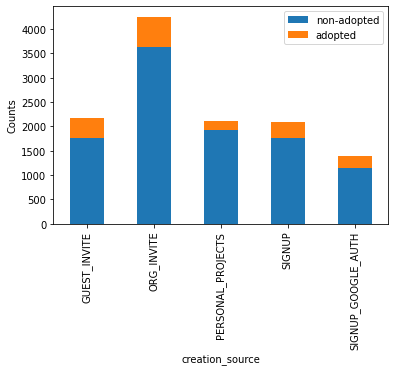

In [32]:
pivedu1_source.plot(kind='bar',stacked=True)
plt.ylabel('Counts')
plt.legend(['non-adopted', 'adopted'])
plt.show()

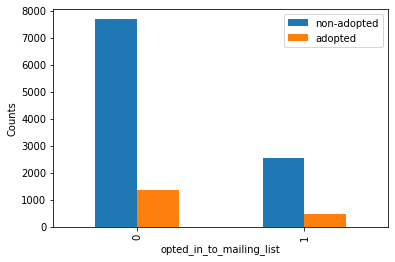

In [33]:
pivedu_opt=df.groupby('opted_in_to_mailing_list')['adopted'].value_counts().reset_index(name='sum')
pivedu1_opt=pd.pivot_table(pivedu_opt,index=["opted_in_to_mailing_list"],columns=['adopted'])
pivedu1_opt.plot(kind='bar')
plt.ylabel('Counts')
plt.legend(['non-adopted', 'adopted'])
plt.show()




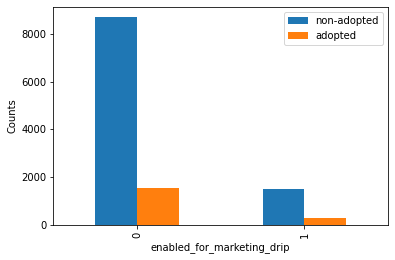

In [34]:
pivedu_en=df.groupby('enabled_for_marketing_drip')['adopted'].value_counts().reset_index(name='sum')
pivedu1_en=pd.pivot_table(pivedu_en,index=["enabled_for_marketing_drip"],columns=['adopted'])
pivedu1_en.plot(kind='bar')
plt.ylabel('Counts')
plt.legend(['non-adopted', 'adopted'])
plt.show()


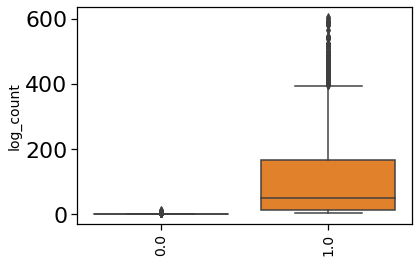

In [35]:
plt.figsize=(5, 5)
sns.set_context("notebook", font_scale=2)
g=sns.boxplot(x="adopted", y="log_count", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90,size=14)
g.set(xlabel=None)
g.xaxis.label.set_size(14)
g.yaxis.label.set_size(14)
plt.show()

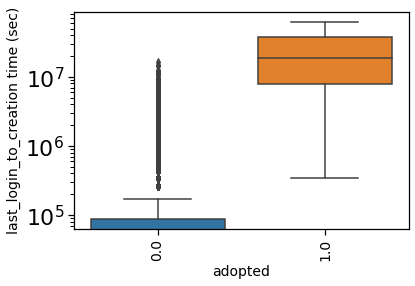

In [36]:
plt.figsize=(5, 5)
sns.set_context("notebook", font_scale=2)
g=sns.boxplot(x="adopted", y="delta_last_creation", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90,size=14)
g.set(yscale="log")
#g.set(xlabel=None)
g.set(ylabel="last_login_to_creation time (sec)")
g.xaxis.label.set_size(14)
g.yaxis.label.set_size(14)
plt.show()


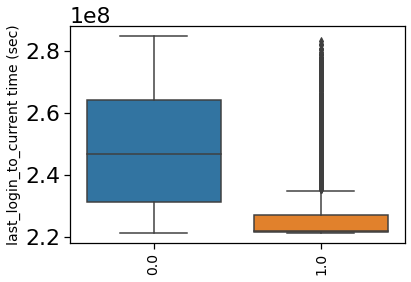

In [37]:
plt.figsize=(5, 5)
sns.set_context("notebook", font_scale=2)
g=sns.boxplot(x="adopted", y="delta_login", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90,size=14)
#g.set(yscale="log")
g.set(xlabel=None)
g.set(ylabel="last_login_to_current time (sec)")
g.xaxis.label.set_size(14)
g.yaxis.label.set_size(14)
plt.show()




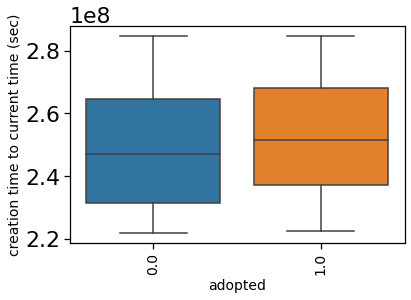

In [38]:
plt.figsize=(5, 5)
sns.set_context("notebook", font_scale=2)
g=sns.boxplot(x="adopted", y="delta_creation", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90,size=14)
#g.set(yscale="log")
#g.set(xlabel=None)
g.set(ylabel="creation time to current time (sec)")
g.xaxis.label.set_size(14)
g.yaxis.label.set_size(14)
plt.show()


## 2.2  Feature correlation heatmap <a id='2.2_Feature correlation heatmap'></a>

In [39]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'log_count', 'adopted', 'creation_time_utc', 'delta_last_creation',
       'delta_creation', 'delta_login'],
      dtype='object')

In [40]:
features = [x for x in df.columns if x not in ['object_id','creation_time','name','email']]
features



['creation_source',
 'last_session_creation_time',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'invited_by_user_id',
 'log_count',
 'adopted',
 'creation_time_utc',
 'delta_last_creation',
 'delta_creation',
 'delta_login']

In [41]:
df_feature=df[features]

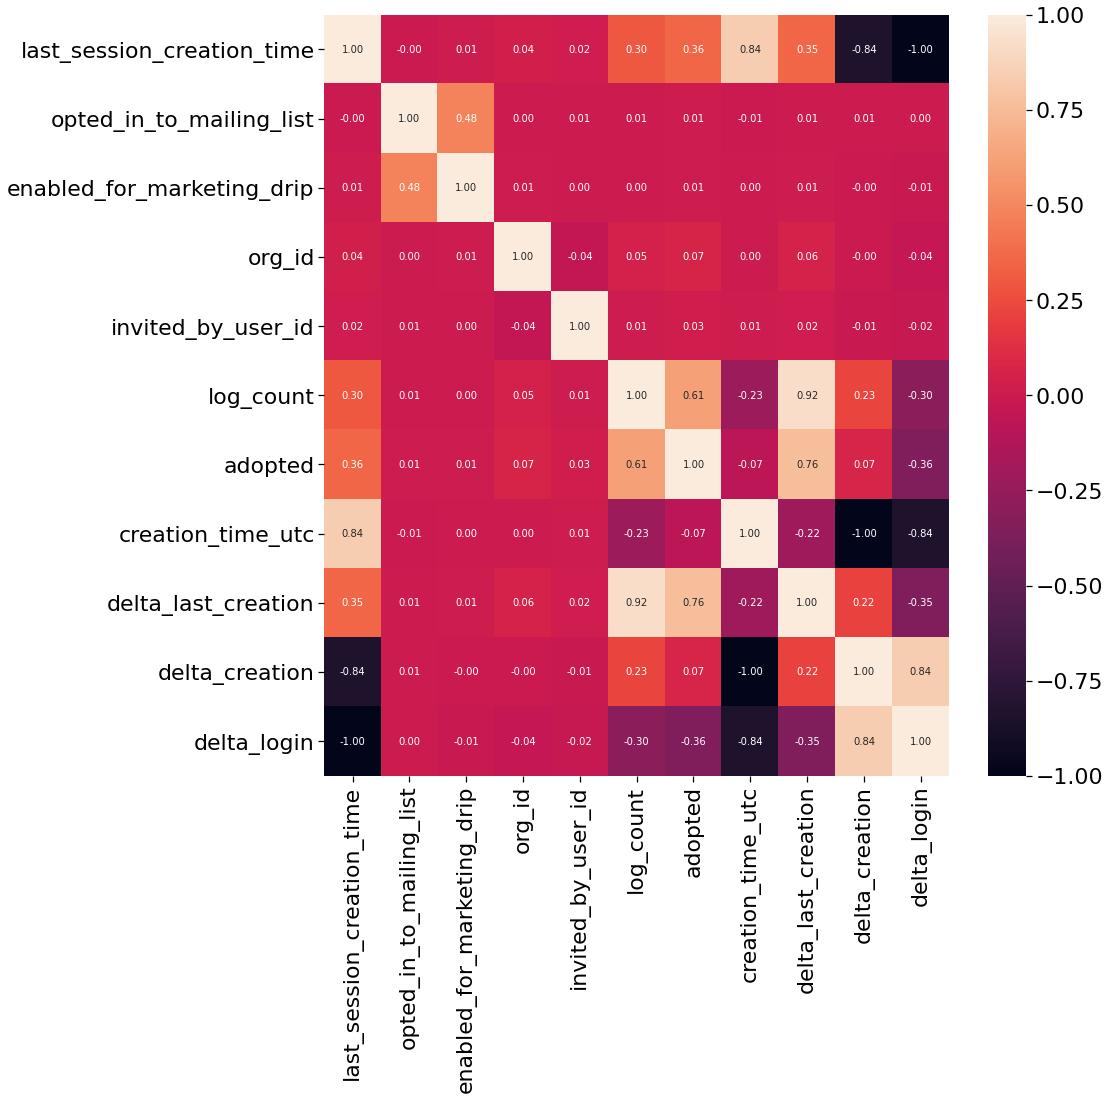

In [42]:
plt.subplots(figsize=(14,14))

corr = df_feature.corr(method='pearson')
ax = sns.heatmap(corr, annot=True,annot_kws={'size':10}, fmt=".2f")
plt.savefig('heatmap.png',dpi=600)

## 3  Pre-Processing and Training Data <a id='3_Pre-Processing and Training Data'></a>


In [43]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'log_count', 'adopted', 'creation_time_utc', 'delta_last_creation',
       'delta_creation', 'delta_login'],
      dtype='object')

In [44]:
columns_to_drop=['object_id','creation_time','name','email']
dff=df.copy()
dff=dff.drop(columns=columns_to_drop)

In [45]:
from sklearn.preprocessing import OneHotEncoder
df_encoded =pd.get_dummies(dff, columns=['creation_source'])

In [46]:
df_encoded.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,log_count,adopted,creation_time_utc,delta_last_creation,delta_creation,delta_login,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,11,10803.0,1.0,0.0,1.398139e+09,0.0,225126915.0,225126915.0,1,0,0,0,0
1,1.396238e+09,0,0,1,316.0,14.0,1.0,1.384487e+09,11750400.0,238778621.0,227028221.0,0,1,0,0,0
2,1.363735e+09,0,0,94,1525.0,1.0,0.0,1.363735e+09,0.0,259530833.0,259530833.0,0,1,0,0,0
3,1.369210e+09,0,0,1,5151.0,1.0,0.0,1.369124e+09,86400.0,254141957.0,254055557.0,1,0,0,0,0
4,1.358850e+09,0,0,193,5240.0,1.0,0.0,1.358418e+09,432000.0,264848065.0,264416065.0,1,0,0,0,0


In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 0 to 11998
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          11999 non-null  float64
 1   opted_in_to_mailing_list            11999 non-null  int64  
 2   enabled_for_marketing_drip          11999 non-null  int64  
 3   org_id                              11999 non-null  int64  
 4   invited_by_user_id                  11999 non-null  float64
 5   log_count                           11999 non-null  float64
 6   adopted                             11999 non-null  float64
 7   creation_time_utc                   11999 non-null  float64
 8   delta_last_creation                 11999 non-null  float64
 9   delta_creation                      11999 non-null  float64
 10  delta_login                         11999 non-null  float64
 11  creation_source_GUEST_INVITE        11999

In [48]:
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns='adopted'), 
                                                    df_encoded.adopted, test_size=0.3, 
                                                    random_state=47)


In [50]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [51]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1 
            
        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [52]:
final_iv, IV = data_vars(X_train, y_train)

last_session_creation_time
0   -1.591258
1   -1.172450
2   -1.133895
3    1.574169
dtype: float64
opted_in_to_mailing_list
enabled_for_marketing_drip
org_id
0   -0.483242
1    0.015985
2    0.171562
3    0.196394
dtype: float64
invited_by_user_id
0   -0.077606
1    0.073728
dtype: float64
log_count
0        -inf
1    2.548689
dtype: float64
creation_time_utc


divide by zero encountered in log


0    0.162079
1    0.134688
2   -0.354503
dtype: float64
delta_last_creation
0        -inf
1    0.938176
dtype: float64
delta_creation
0   -0.354503
1    0.134688
2    0.162079
dtype: float64
delta_login


divide by zero encountered in log


0    1.574169
1   -1.134399
2   -1.171947
3   -1.591258
dtype: float64
creation_source_GUEST_INVITE
creation_source_ORG_INVITE
creation_source_PERSONAL_PROJECTS
creation_source_SIGNUP
creation_source_SIGNUP_GOOGLE_AUTH


In [53]:
#features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(8399, 6)

,creation_source_GUEST_INVITE,creation_source_PERSONAL_PROJECTS,creation_time_utc,delta_creation,delta_last_creation,org_id
10376,0,0,1.388074e+09,235191373.0,0.0,189
9343,0,0,1.389648e+09,233617473.0,11836800.0,116
5341,1,0,1.396200e+09,227065459.0,0.0,5
1647,0,0,1.386496e+09,236769398.0,0.0,27
9119,1,0,1.347338e+09,275927498.0,54432000.0,288


In [54]:
display(X2.shape[1])
for i in range(X2.shape[1]):
    print((i, variance_inflation_factor(X2.values, i) ))


6

(0, 1.0485051533063487)
(1, 1.054877662259871)
(2, 134.71577842217306)
(3, 135.3846140488455)
(4, 1.0616751794727002)
(5, 1.004100543574585)


In [55]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing delta_creation with VIF of 135.384614
Iteration # 2
Complete


In [56]:
X_train=final_df
display(len(X_train.columns))
display(X_train.columns)
X_train.head()

5

Index(['creation_source_GUEST_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_time_utc', 'delta_last_creation', 'org_id'],
      dtype='object')

,creation_source_GUEST_INVITE,creation_source_PERSONAL_PROJECTS,creation_time_utc,delta_last_creation,org_id
10376,0,0,1.388074e+09,0.0,189
9343,0,0,1.389648e+09,11836800.0,116
5341,1,0,1.396200e+09,0.0,5
1647,0,0,1.386496e+09,0.0,27
9119,1,0,1.347338e+09,54432000.0,288


## 4  Data modeling <a id='4_Data modeling'></a>

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [58]:
X_test=X_test[X_train.columns]
X_test.head()

,creation_source_GUEST_INVITE,creation_source_PERSONAL_PROJECTS,creation_time_utc,delta_last_creation,org_id
1369,1,0,1.397246e+09,0.0,40
10776,0,0,1.399296e+09,259200.0,133
10621,1,0,1.372769e+09,0.0,311
5568,0,1,1.363876e+09,0.0,1
40,0,0,1.398901e+09,0.0,64


## 4.1  Logistic regression <a id='4.1_Logistic regression'></a>

In [59]:
def run_regression_accuracy(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    #cm = confusion_matrix(y_test, y_pred)
    #print('\nConfusion matrix: \n',cm)
    
    matrix = confusion_matrix(y_test, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    print('\nConfusion matrix: \n',matrix)
    
    print('\nClassification report: \n',classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
  
    return logreg


Accuracy of logistic regression classifier on test set: 0.97

Confusion matrix: 
 [[0.99347045 0.00652955]
 [0.18808194 0.81191806]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3063
         1.0       0.96      0.81      0.88       537

    accuracy                           0.97      3600
   macro avg       0.96      0.90      0.93      3600
weighted avg       0.97      0.97      0.97      3600



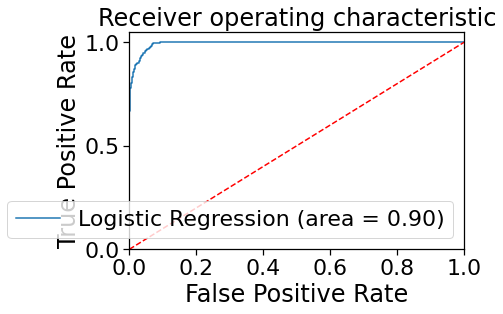

In [60]:
logreg = run_regression_accuracy(X_train, y_train, X_test, y_test)

## 4.2  Random Forest <a id='4.2_Random Forest'></a>

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Features [0.00174759 0.00399902 0.05179107 0.90904781 0.0334145 ]


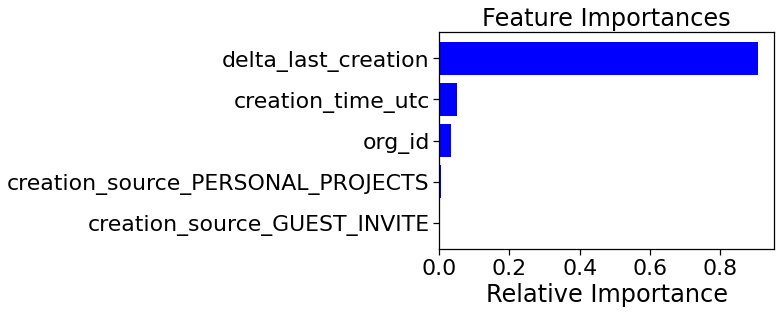

[[3017   46]
 [  91  446]]


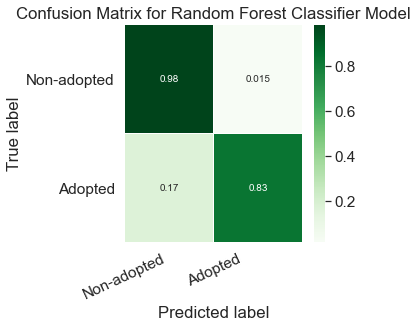

In [61]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth=50, class_weight=dict({1:48, 0:1}), verbose=2)
# Train the model on training data
rf.fit(X_train, y_train)

y_pred1 = rf.predict(X_test)


print("Features",rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



roc1 = roc_auc_score(y_test, y_pred1)

roc1

#conf1 = confusion_matrix(y_test, y_pred1)
#conf1

print(confusion_matrix(y_test, y_pred1))
matrix = confusion_matrix(y_test, y_pred1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#print(matrix)


# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-adopted', 'Adopted']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.show()

0.9077610404959537


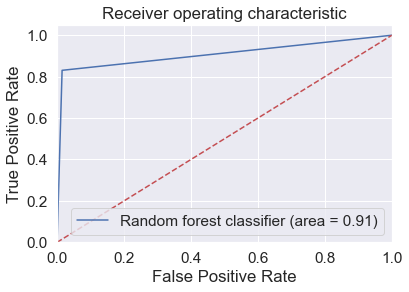

In [62]:
roc1 = roc_auc_score(y_test, y_pred1)
print(roc1)
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)

plt.figure()
plt.plot(fpr1, tpr1, label='Random forest classifier (area = %0.2f)' % roc1 )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


## 4.3  XGBClassifier <a id='4.3_XGBClassifier'></a>

In [63]:
# Import the model we are using
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate model with 100 decision trees
xgb = XGBClassifier(n_estimators = 10, max_depth=30, max_delta_step=4, scale_pos_weight=49, random_state = 42, verbosity=2, n_jobs=-1, oob_score=True)
# Train the model on training data
xgb.fit(X_train, y_train)

y_pred2 = xgb.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=15
[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=16
[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=14
[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=16
[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=14
[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=20
[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=20
[15:08:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=21
[15:08:57] INFO: src/tree/updater_prune.cc:74

0.9477444795240362

[[2914  149]
 [  30  507]]


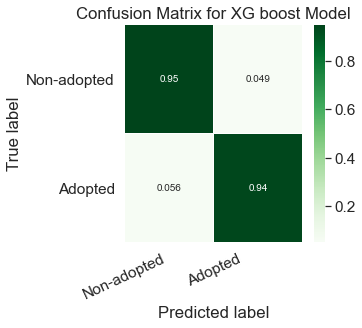

In [64]:
print(confusion_matrix(y_test, y_pred2))
matrix = confusion_matrix(y_test, y_pred2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#print(matrix)


# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-adopted', 'Adopted']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XG boost Model')
plt.show()

In [65]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      3063
         1.0       0.77      0.94      0.85       537

    accuracy                           0.95      3600
   macro avg       0.88      0.95      0.91      3600
weighted avg       0.96      0.95      0.95      3600



0.9477444795240362


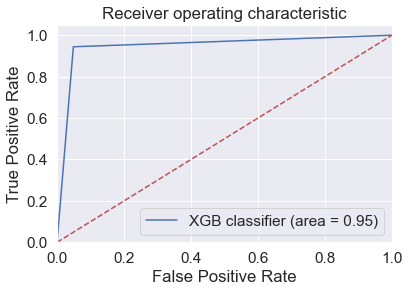

In [66]:
roc2 = roc_auc_score(y_test, y_pred2)
print(roc2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

plt.figure()
plt.plot(fpr, tpr, label='XGB classifier (area = %0.2f)' % roc2 )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 4.4 Hyperparameter Grid Search with XGBoost  <a id='4.4_Hyperparameter Grid Search with XGBoost'></a>

In [67]:
def algorithm_pipeline(X_train, X_test, y_train, y_test, \
                       model, param_grid, cv=10, scoring_fit='roc_auc', do_probabilities=False):
                       #model, param_grid, cv=10, scoring_fit='ne_mean_squared_error', do_probabilities=False):
                       
    gs = GridSearchCV(estimator=model, \
                      param_grid=param_grid, \
                      cv=cv, \
                      n_jobs=-1, \
                      scoring=scoring_fit, \
                      verbose=2)
    
    fitted_model = gs.fit(X_train, y_train)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test)
    else:
        pred = fitted_model.predict(X_test)
    return fitted_model, pred

In [68]:
xgb = XGBClassifier(n_estimators = 10, max_depth=30, max_delta_step=4, 
                    scale_pos_weight=49, random_state = 42, verbosity=2, n_jobs=-1, oob_score=True)


param_grid = {'n_estimators':[10,20,50,100,150,200],\
              'eta': [0.01, 0.05, 0.1], \
              'max_depth': [9, 10, 11], \
              'scale_pos_weight': [49, 50, 51], \
              'max_delta_step': [4, 6, 8], \
              'grow_policy':['depthwise', 'losswise']}

#model = XGBClassifier(objective='binary:logistic', n_jobs=-1, random_state = 42, verbosity=2)
model = XGBClassifier(n_jobs=-1, random_state = 42, verbosity=2)



In [69]:
#model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, param_grid, cv=5, scoring_fit='roc_auc')

In [70]:
#print(model.best_score_)
#print(model.best_params_)

#used best parameters from grid search below

In [71]:
xgb = XGBClassifier(eta=0.01,n_estimators=100, max_delta_step=4, max_depth=9,grow_policy='depthwise',scoring_fit='roc_auc', scale_pos_weight=49, n_jobs=-1, random_state = 42, verbosity=2)
xgb.fit(X_train, y_train)


[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree prun

[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[15:08:58] INFO: src/tree/updater_prune.cc:74: tree prun

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              grow_policy='depthwise', learning_rate=0.1, max_delta_step=4,
              max_depth=9, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=49,
              scoring_fit='roc_auc', seed=None, silent=None, subsample=1,
              verbosity=2)

Test 0.9410453110380338


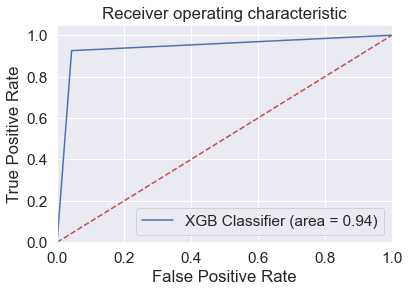

In [72]:
y_pred3 = xgb.predict(X_test)

roc = roc_auc_score(y_test, y_pred3)

print("Test",roc)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)

plt.figure()
plt.plot(fpr3, tpr3, label='XGB Classifier (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [73]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      3063
         1.0       0.79      0.93      0.85       537

    accuracy                           0.95      3600
   macro avg       0.89      0.94      0.91      3600
weighted avg       0.96      0.95      0.95      3600



[[2930  133]
 [  40  497]]


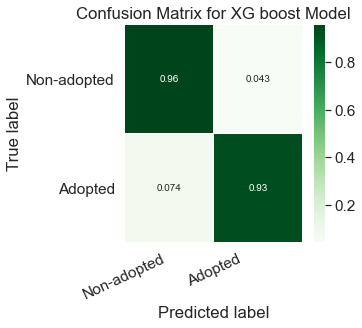

In [74]:
print(confusion_matrix(y_test, y_pred3))
matrix = confusion_matrix(y_test, y_pred3)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#print(matrix)


# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-adopted', 'Adopted']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XG boost Model')
plt.show()

In [75]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      3063
         1.0       0.79      0.93      0.85       537

    accuracy                           0.95      3600
   macro avg       0.89      0.94      0.91      3600
weighted avg       0.96      0.95      0.95      3600



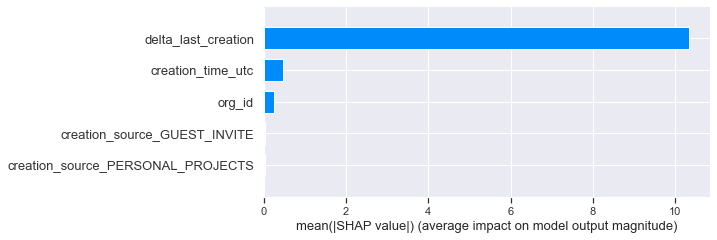

In [76]:
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")


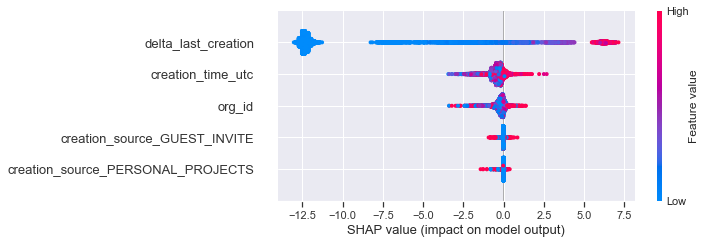

In [77]:
shap.summary_plot(shap_values, X_train)

## 4.5 Neural network  <a id='4.5_Neural network'></a>

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns='adopted'), 
                                                    df_encoded.adopted, test_size=0.2, 
                                                    random_state=47)
print(len(X_train),len(X_test))


import random
seed=5
test_index=X_test.index
valid_size=int(len(X_test)*0.5)
valid_index=X_test.sample(valid_size,random_state=seed).index

Xf_valid=X_test.loc[valid_index]
yf_valid=y_test.loc[valid_index]

valid_index=Xf_valid.index

final_test_index=[]
for i in test_index:
    if i not in valid_index:
        final_test_index.append(i)

Xf_test=X_test.loc[final_test_index]
yf_test=y_test.loc[final_test_index]

9599 2400


In [79]:
X_test.sort_index().head()
print("Sorted test index:", X_test.sort_index().head(10).index)
print("Sorted Validation index:-", Xf_valid.sort_index().head().index)
print("Sorted final test index:-",Xf_test.sort_index().head().index)

Sorted test index: Int64Index([4, 7, 11, 14, 15, 17, 18, 21, 28, 38], dtype='int64')
Sorted Validation index:- Int64Index([7, 17, 18, 28, 38], dtype='int64')
Sorted final test index:- Int64Index([4, 11, 14, 15, 21], dtype='int64')


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(Xf_test)
X_valid_scaled = scaler.transform(Xf_valid)


print("target",y_train.value_counts())



train_inputs=X_train_scaled
train_targets=y_train

validation_inputs=X_valid_scaled
validation_targets=yf_valid

test_inputs=X_test_scaled
test_targets=yf_test
print(" ")
print("Train:-", len(train_inputs),"Validation:-", len(validation_inputs),"Test:-", len(test_inputs))

target 0.0    8131
1.0    1468
Name: adopted, dtype: int64
 
Train:- 9599 Validation:- 1200 Test:- 1200


In [81]:
#Use tensorflow
import tensorflow as tf

#Define model
# Set the input and output sizes
input_size = len(X_train.columns)
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 4
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)


# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  


Epoch 1/100
96/96 - 1s - loss: 0.5031 - accuracy: 0.8471 - val_loss: 0.4288 - val_accuracy: 0.8533
Epoch 2/100
96/96 - 0s - loss: 0.3781 - accuracy: 0.8471 - val_loss: 0.3265 - val_accuracy: 0.8533
Epoch 3/100
96/96 - 0s - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.2467 - val_accuracy: 0.9075
Epoch 4/100
96/96 - 0s - loss: 0.2124 - accuracy: 0.9329 - val_loss: 0.1698 - val_accuracy: 0.9442
Epoch 5/100
96/96 - 0s - loss: 0.1504 - accuracy: 0.9535 - val_loss: 0.1226 - val_accuracy: 0.9575
Epoch 6/100
96/96 - 0s - loss: 0.1190 - accuracy: 0.9624 - val_loss: 0.1000 - val_accuracy: 0.9683
Epoch 7/100
96/96 - 0s - loss: 0.1032 - accuracy: 0.9671 - val_loss: 0.0876 - val_accuracy: 0.9767
Epoch 8/100
96/96 - 0s - loss: 0.0946 - accuracy: 0.9684 - val_loss: 0.0816 - val_accuracy: 0.9767
Epoch 9/100
96/96 - 0s - loss: 0.0894 - accuracy: 0.9709 - val_loss: 0.0785 - val_accuracy: 0.9758
Epoch 10/100
96/96 - 0s - loss: 0.0866 - accuracy: 0.9708 - val_loss: 0.0755 - val_accuracy: 0.9767
Epoch 11/

In [82]:
#Test the model
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)


38/38 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9683


In [83]:
#In a two class problem, there is no difference at all between using a softmax with 
#two outputs or one binary output, assuming you use a sigmoid (logistic) function 
#to model the probability of the output. The two things are mathematically equivalent.

import keras
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(6, input_dim=15, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid')
             )
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
    return model

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
history=keras_model.fit(train_inputs, train_targets,batch_size=100, epochs=100, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=1)


Epoch 1/100
96/96 [==============================] - 15s 7ms/step - loss: 1.2554 - auc: 0.5358 - val_loss: 0.7785 - val_auc: 0.5707
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.7027 - auc: 0.5524 - val_loss: 0.5186 - val_auc: 0.7031
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4812 - auc: 0.6974 - val_loss: 0.3774 - val_auc: 0.8183
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.3569 - auc: 0.8042 - val_loss: 0.2822 - val_auc: 0.9124
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 0.2659 - auc: 0.9040 - val_loss: 0.2075 - val_auc: 0.9676
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1942 - auc: 0.9575 - val_loss: 0.1549 - val_auc: 0.9795
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1514 - auc: 0.9675 - val_loss: 0.1269 - val_auc: 0.9838
Epoch 8/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1261 - 

In [84]:
# evaluate the model
_, train_acc = keras_model.evaluate(train_inputs, train_targets, verbose=0)
_, test_acc = keras_model.evaluate(test_inputs, test_targets, verbose=0)

print(train_acc)
print(test_acc)

0.9938514232635498
0.9886062145233154


In [85]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

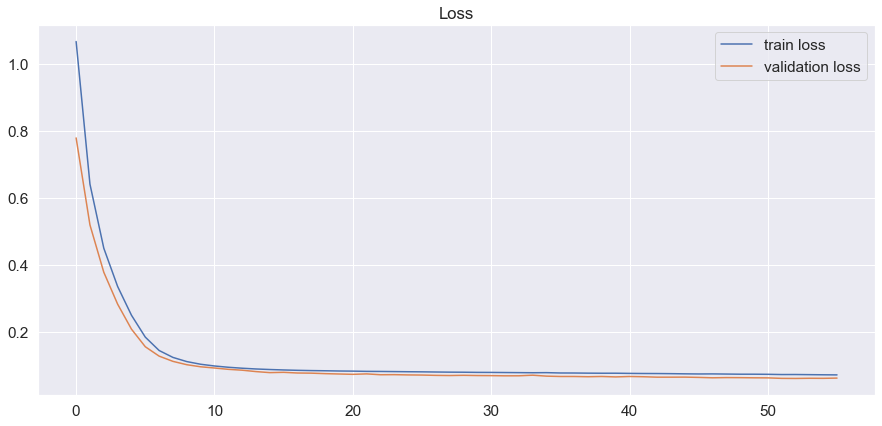

In [86]:
fig = plt.figure(figsize=(15, 15))

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()


# plot accuracy during training
#plt.plot.subplot(212)
#plt.plot.title('Accuracy')
#plt.plot.plot(history.history['accuracy'], label='train')
#plt.plot.plot(history.history['val_accuracy'], label='test')
#plt.plot.legend()
#plt.plot.show()

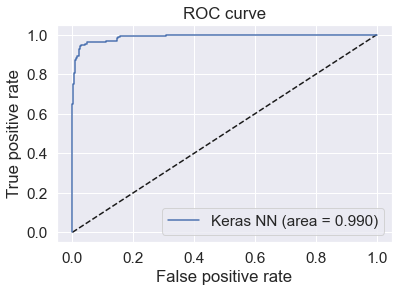

Confusion matrix without normalization
[[1037    8]
 [  27  128]]
 


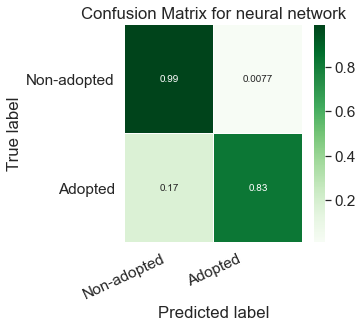

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_keras = keras_model.predict(test_inputs)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_targets, y_pred_keras)

                          
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras NN (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


rounded_predictions=[]
for i in range(len(y_pred_keras)):
    #print(y_pred_keras[i][0], round(y_pred_keras[i][0]))
    rounded_predictions.append(round(y_pred_keras[i][0]))

print("Confusion matrix without normalization")
print(confusion_matrix(y_true=test_targets, y_pred=rounded_predictions))


#matrix = confusion_matrix(y_test, y_pred3)
matrix=confusion_matrix(y_true=test_targets, y_pred=rounded_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#print(matrix)

print(' ')

# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-adopted', 'Adopted']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for neural network')
plt.show()
    

In [88]:
print(classification_report(test_targets, rounded_predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1045
         1.0       0.94      0.83      0.88       155

    accuracy                           0.97      1200
   macro avg       0.96      0.91      0.93      1200
weighted avg       0.97      0.97      0.97      1200

